### K Means Clustering


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs


In [28]:
x,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [29]:
x

array([[-8.69905512,  8.36046635],
       [-8.74859439,  3.05116175],
       [-7.14846019,  8.49821148],
       ...,
       [ 1.8103366 , -3.22339097],
       [-8.57864907,  8.46645562],
       [ 1.94703858, -4.8817006 ]])

In [30]:
y

array([0, 2, 0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0, 0, 1,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0,
       2, 0, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 2, 1, 0,
       1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 1, 0, 0,
       2, 2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 1,
       0, 2, 1, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 0, 1, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 1, 1,
       2, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0,
       0, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2,
       1, 0, 1, 2, 0, 2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0,
       2, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 1, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0,
       1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2,

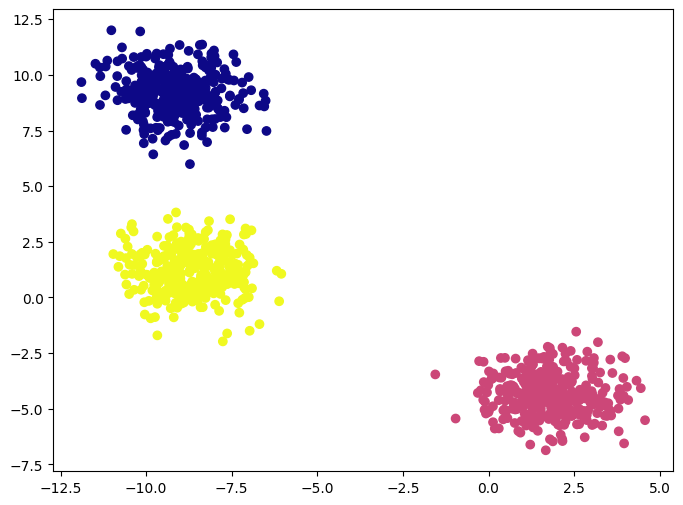

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='plasma')

In [32]:
### Standardisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [34]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [35]:
from sklearn.cluster import KMeans


In [38]:
### Elbow method to select k-values


wcss=[]
for k in range(1,11):
    kmean=KMeans(n_clusters=k,init='k-means++')
    kmean.fit(x_train)
    wcss.append(kmean.inertia_)

d:\anaconda3\envs\covid_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda3\envs\covid_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda3\envs\covid_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda3\envs\covid_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory le

In [39]:
wcss

[1340.0000000000002,
 264.83739654966746,
 44.873149230322376,
 39.3625296970187,
 36.3330822988662,
 30.193323482048058,
 24.971114377131023,
 22.268295313451627,
 21.471316742862708,
 17.664043639965303]

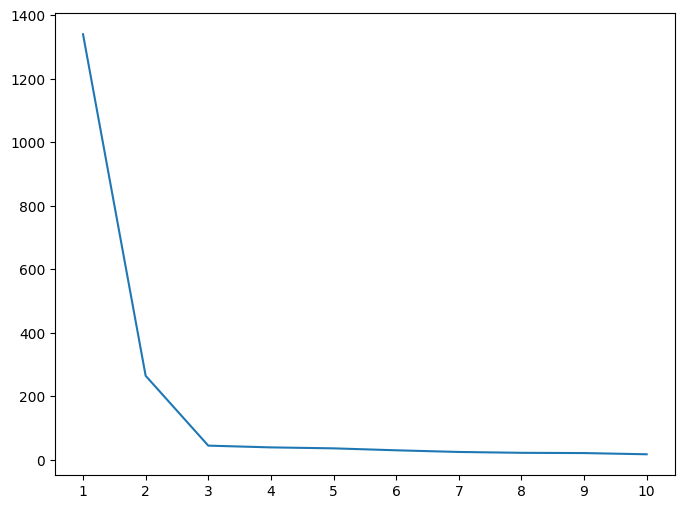

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.show() ### After 3 wcss in almost stable


In [43]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [49]:
kmeans.fit(x_train)

d:\anaconda3\envs\covid_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3)

In [54]:
yt_pred=kmeans.predict(x_train)

In [51]:
y_pred=kmeans.predict(x_test)

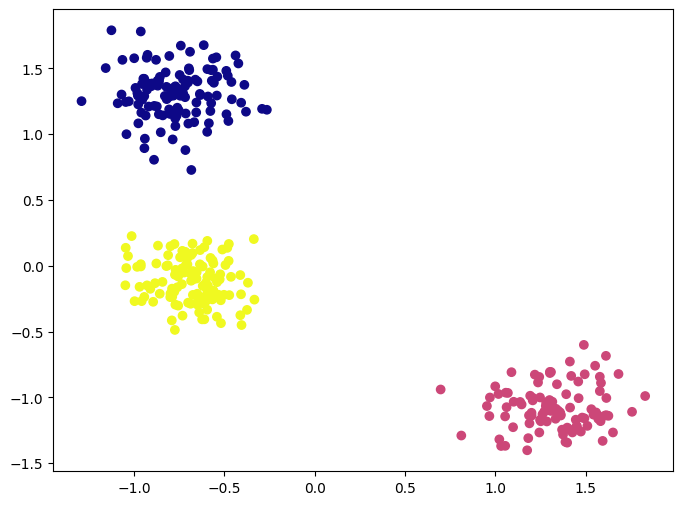

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred,cmap='plasma')

In [59]:
### Validating K Value
##KneeLocator
## Shiloute Scoring
from kneed import KneeLocator
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1

In [ ]:
k1.elbow ###Get the correct video

np.int64(3)

In [62]:
### Shiloute Score
from sklearn.metrics import silhouette_score
coeffs=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    score=silhouette_score(x_train,kmeans.labels_)
    coeffs.append(score)

d:\anaconda3\envs\covid_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda3\envs\covid_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda3\envs\covid_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda3\envs\covid_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory le

In [63]:
coeffs

[np.float64(0.7375737548588959),
 np.float64(0.7992866922516638),
 np.float64(0.6496715247964772),
 np.float64(0.4738624104750654),
 np.float64(0.4729148139509853),
 np.float64(0.3447355360416228),
 np.float64(0.3420932061651662),
 np.float64(0.35994546673784683),
 np.float64(0.3426621518429574)]

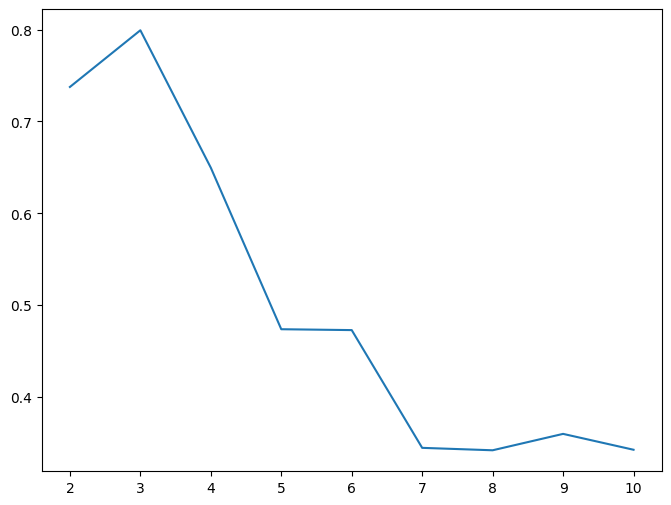

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(2,11),coeffs)
plt.xticks(range(2,11))
plt.show() ### Peak at value 3
